In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef

In [2]:
df = pd.read_csv('grades.csv')
df

,white_black_grade,white_grade,random_grade
0,83.333333,90.000000,99.657534
1,80.000000,80.000000,99.657534
2,75.000000,68.000000,99.315068
3,83.333333,80.000000,99.657534
4,83.333333,90.000000,99.657534
5,75.000000,68.000000,99.315068
6,80.000000,90.000000,99.657534
7,80.000000,90.000000,99.657534
8,71.428571,70.000000,99.315068
9,71.428571,70.000000,99.315068


In [3]:
# corr
df.corr()

,white_black_grade,white_grade,random_grade
white_black_grade,1.000000,0.867531,0.546963
white_grade,0.867531,1.000000,0.325169
random_grade,0.546963,0.325169,1.000000


In [5]:
bins = [-0.001, 25-0.001, 50-0.001, 75-0.001, 100+0.001]
labels = [0, 1, 2, 3]
cat_white=pd.cut(df['white_grade'], bins=bins, labels=labels)
cat_white_black=pd.cut(df['white_black_grade'], bins=bins, labels=labels)
cat_random=pd.cut(df['random_grade'], bins=bins, labels=labels)
categorized_grade = pd.concat([cat_white_black, cat_white, cat_random], axis=1)
categorized_grade

,white_black_grade,white_grade,random_grade
0,3,3,3
1,3,3,3
2,3,2,3
3,3,3,3
4,3,3,3
5,3,2,3
6,3,3,3
7,3,3,3
8,2,2,3
9,2,2,3


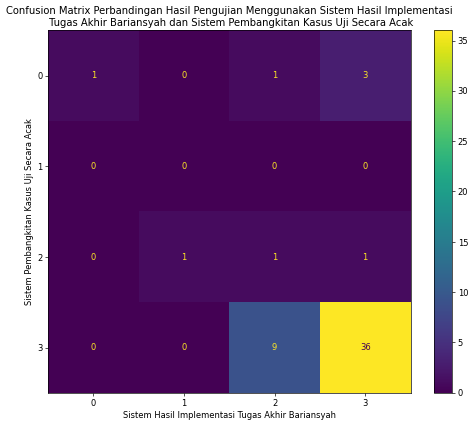

In [6]:
cm = confusion_matrix(categorized_grade['random_grade'], categorized_grade['white_black_grade'], labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,8), dpi=60)
ax.set_title('Confusion Matrix Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi\n Tugas Akhir Bariansyah dan Sistem Pembangkitan Kasus Uji Secara Acak')
disp.plot(ax = ax)
disp.ax_.set(xlabel='Sistem Hasil Implementasi Tugas Akhir Bariansyah', ylabel='Sistem Pembangkitan Kasus Uji Secara Acak')
plt.show()

In [29]:
print(classification_report(categorized_grade['random_grade'], categorized_grade['white_black_grade'], labels=labels))
mcc = matthews_corrcoef(categorized_grade['random_grade'], categorized_grade['white_black_grade'])
print('mcc: {}'.format(mcc))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         0
           2       0.09      0.33      0.14         3
           3       0.90      0.80      0.85        45

    accuracy                           0.72        53
   macro avg       0.50      0.33      0.33        53
weighted avg       0.86      0.72      0.76        53

mcc: 0.19501459862559653


C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:13

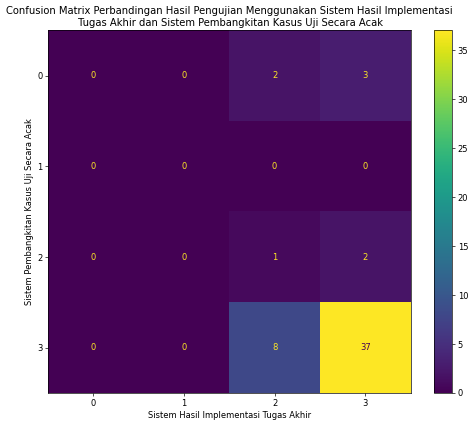

In [7]:
cm = confusion_matrix(categorized_grade['random_grade'], categorized_grade['white_grade'], labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,8), dpi=60)
ax.set_title('Confusion Matrix Perbandingan Hasil Pengujian Menggunakan Sistem Hasil Implementasi\n Tugas Akhir dan Sistem Pembangkitan Kasus Uji Secara Acak')
disp.plot(ax = ax)
disp.ax_.set(xlabel='Sistem Hasil Implementasi Tugas Akhir', ylabel='Sistem Pembangkitan Kasus Uji Secara Acak')
plt.show()

In [28]:
print(classification_report(categorized_grade['random_grade'], categorized_grade['white_grade'], labels=labels))
mcc = matthews_corrcoef(categorized_grade['random_grade'], categorized_grade['white_grade'])
print('mcc: {}'.format(mcc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         0
           2       0.09      0.33      0.14         3
           3       0.88      0.82      0.85        45

   micro avg       0.72      0.72      0.72        53
   macro avg       0.24      0.29      0.25        53
weighted avg       0.75      0.72      0.73        53

mcc: 0.10931374547372782


C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moondemon68\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati